# The Monty Hall Problem

In [0]:
# To display the graphs in the continuity of the code
%matplotlib inline

# The randint function generates int numbers at random
from random import randint, seed

# An Enum is a data structure that consists of a set of named elements.
# Each constant is a key/value pair.
from enum import Enum

# To be able to display graphs:
import matplotlib.pyplot as plt

### Strategies of the player

In [0]:
class Strategie(Enum):
  """Here we define a subclass of Enum,
  which will contain the possible strategies for the player.
  """
  CHANGER = 1
  GARDER = 2

In [0]:
# seed() initializes the state of the random number generator.
# Using this function with a fixed value, 
# the same sequence will be generated from one program run to another.
# Without value, random.seed() takes the internal clock as generator. 
seed()

def play_game(strategie):
    '''Simulation of the Monty Hall game.
    
    This function simulates the participant's choice of door, 
    the elimination of a bad door by the presenter, and the 
    final choice. It only returns the result of the game.
    We will only need the result to perform our calculations.
    
    Args:
        strategie (Strategie): The player's strategy
        
    Returns:
        bool: Has the player won?

    '''

    portes = [0, 1, 2]
    
    bonne_porte = randint(0,2)
    
    # Choice of the player
    premier_choix = randint(0,2)
    
    # Two doors left
    portes.remove(premier_choix)
    
    # The presenter eliminates a door
    if premier_choix == bonne_porte:
        portes.remove(portes[randint(0,1)])
    else:
        portes = [bonne_porte]
    
    deuxieme_choix = 0
    # The second choice depends on the strategy
    if strategie == Strategie.CHANGER:
        deuxieme_choix = portes[0]
    elif strategie == Strategie.GARDER:
        deuxieme_choix = premier_choix
    else:
        raise ValueError("Strategy not recognized!")
    
    return deuxieme_choix == bonne_porte

### Simulate several parties

In [0]:
def play(strategie, nb_tours):
    '''Simulates a sequence of game turns.
    
    This function returns the results of the game Monty Hall in the form of
    a list of winnings by the player.
    
    Args:
        strategy (Strategie): The player's strategy
        nb_turns (int): Number of revolutions
        
    Returns:
        list: List of players' winnings for each game
    '''
    
    # will return the result of each game in a list
    return [1 if play_game(strategie) else 0 for i in range(nb_tours)]

### Analysis of the results

In [19]:
print("By changing doors, the player has won {} out of 10,000 games."
      .format(sum(play(Strategie.CHANGER, 10000))))
      
print("By keeping his initial choice, the player has won {} out of 10,000 games."
      .format(sum(play(Strategie.GARDER, 10000))))

By changing doors, the player has won 6617 out of 10,000 games.
By keeping his initial choice, the player has won 3371 out of 10,000 games.


The player who changed doors therefore won approximately twice as often as the player who kept his initial choice...
Were you expecting it? 
And even after faking it, don't you find it hard to believe?

### Viz with matplotlib


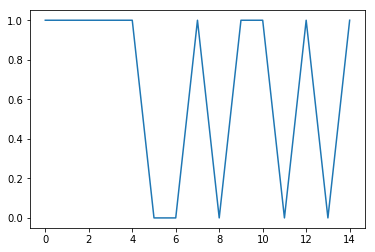

In [24]:
# plot returns an object, which can be manipulated later to customize the graph
# plot linked points together
plot = plt.plot(play(Strategie.CHANGER, 15))

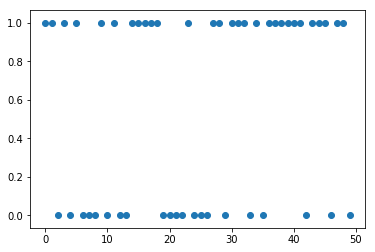

In [27]:
# scatter works like plot but don't linked point
plot = plt.scatter(range(50), play(Strategie.CHANGER, 50))

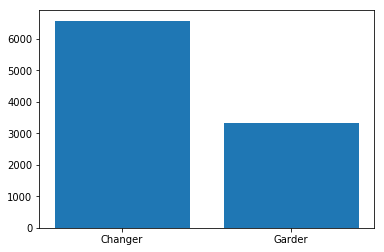

In [30]:
# bar is a function of plot, that show you columns
plot = plt.bar([1,2],[sum(play(Strategie.CHANGER, 10000)),
                      sum(play(Strategie.GARDER, 10000))], 
               tick_label = ["Changer","Garder"])

If you want to know more, don't hesitate to consult the [Wikipedia article](https://https://en.wikipedia.org/wiki/Monty_Hall_problem) dedicated to it.
